In [ ]:
#Team Member: Zhilin Zhai, Yining Liang 

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#A basic importing 

In [7]:
SNAdata = pd.read_csv("Downloads/Copy_of_ACA_4.csv", index_col = 0) 
SNAdata
# The regular "read_csv" is using a new parameter called "index_col=0", because we want the first column to be row name.
# The data we used is called "Copy_of_ACA_4", the specific info is explained in this sheet. Basically we created a sheet based on how many courses in common between 10 TC students current course schedule.

,Zhilin Zhai,Yining Liang,Guoyi Liu,Xinyi Huang,Jiaxin Guo,Qianqian Ma,Yiwen Zheng,Xinyi Liu,Yiyang Liu,Xueqi Wang
Zhilin Zhai,0,2,0,1,2,0,1,0,2,0
Yining Liang,2,0,0,0,1,1,1,1,1,1
Guoyi Liu,0,0,0,1,1,0,0,0,1,0
Xinyi Huang,1,0,0,0,2,0,0,0,2,0
Jiaxin Guo,2,1,1,2,0,0,1,0,3,0
Qianqian Ma,0,1,0,0,0,0,1,2,0,2
Yiwen Zheng,1,1,0,0,1,1,0,1,1,2
Xinyi Liu,0,1,0,0,0,2,1,0,0,2
Yiyang Liu,2,1,1,2,3,0,1,0,0,0
Xueqi Wang,0,1,0,0,0,2,2,2,0,0


In [8]:
G = nx.Graph(SNAdata)
## We are making an ajacency matrix for undirected graph, so we call it "Graph()".

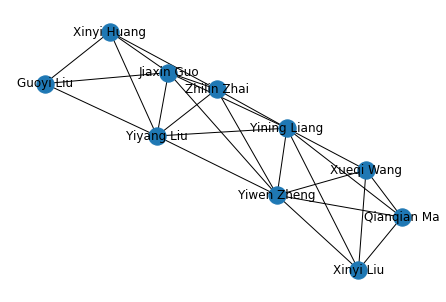

In [9]:
nx.draw(G, with_labels = True)
# We then plotted the network. 

Network Statistics
Density

In [10]:
density = nx.density(G)

print('The edge density is: %.3f' % (density))
# Using a format for the output decimal places.
## This value of 0.556 indicates that this network is quite well-connected because we can see more than 55.60% links among all possible links.

The edge density is: 0.556


Degree Centrality

In [11]:
degree = nx.degree(G)
degree
# We then looked at the degree, which is a common certrality measure. It provides the idea of how "important" each person is in this network.

DegreeView({'Zhilin Zhai': 5, 'Yining Liang': 7, 'Guoyi Liu': 3, 'Xinyi Huang': 4, 'Jiaxin Guo': 6, 'Qianqian Ma': 4, 'Yiwen Zheng': 7, 'Xinyi Liu': 4, 'Yiyang Liu': 6, 'Xueqi Wang': 4})

In [12]:
pd.DataFrame(degree)
# To visualize the dictionary in a more clear way. 

,0,1
0,Zhilin Zhai,5
1,Yining Liang,7
2,Guoyi Liu,3
3,Xinyi Huang,4
4,Jiaxin Guo,6
5,Qianqian Ma,4
6,Yiwen Zheng,7
7,Xinyi Liu,4
8,Yiyang Liu,6
9,Xueqi Wang,4


Closeness centrality

In [14]:
close = nx.closeness_centrality(G) #We then text the closeness certrality. It measures "how quickly" a person can 'travel' to the rest of the graph
pd.DataFrame.from_dict(close, orient = 'index') #To visualize the closeness certrality dictionary.
.

,0
Zhilin Zhai,0.692308
Yining Liang,0.818182
Guoyi Liu,0.500000
Xinyi Huang,0.529412
Jiaxin Guo,0.750000
Qianqian Ma,0.562500
Yiwen Zheng,0.818182
Xinyi Liu,0.562500
Yiyang Liu,0.750000
Xueqi Wang,0.562500


Betweenness centrality

In [16]:
between = nx.betweenness_centrality(G) # We also tested the betweenness centrality, which testing the amount of influence a person has over the flow of information in a graph.
pd.DataFrame.from_dict(between, orient = 'index') # To visualize the betweeness centrality dictionalry below. 

,0
Zhilin Zhai,0.046296
Yining Liang,0.208333
Guoyi Liu,0.000000
Xinyi Huang,0.009259
Jiaxin Guo,0.125000
Qianqian Ma,0.000000
Yiwen Zheng,0.208333
Xinyi Liu,0.000000
Yiyang Liu,0.125000
Xueqi Wang,0.000000


Community detection

In [17]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities 

c = list(greedy_modularity_communities(G))

print(len(c))
# We want to see the network structure through community detection. We used a method of greedy modularity maxiazation here.
# We used the Clauset-Newman-Moore greedy modularity maximization.

2


In [19]:
#Lets see these 2 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])

print(community_0)
print(community_1)

['Guoyi Liu', 'Jiaxin Guo', 'Xinyi Huang', 'Yiyang Liu', 'Zhilin Zhai']
['Qianqian Ma', 'Xinyi Liu', 'Xueqi Wang', 'Yining Liang', 'Yiwen Zheng']


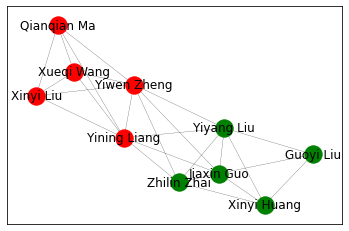

In [20]:
#Printed out the results using the steps below. 
# Set seed (optional)
np.random.seed(12)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

Make Your Network Prettier

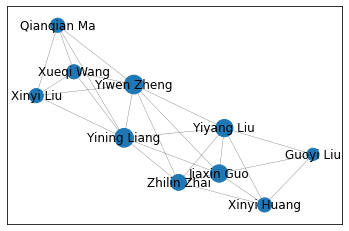

In [21]:
# we tried to use some network attributes to make the network prettier. We multiplied the degree by 50 times here. 
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

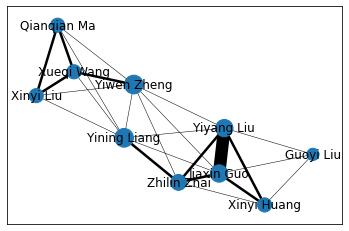

In [22]:
#Since the edge can be changed depending on the weight on it, and this is a weighted graph, we obtained the wegiht of each edge in this step.
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])#5**e/10 is the width of the edge.
nx.draw_networkx_labels(G, pos=pos)

plt.show()#To show the graph/dictionary below. 

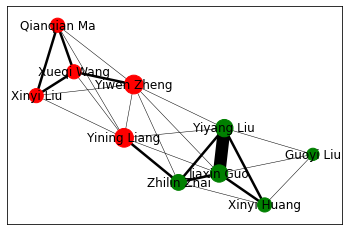

In [23]:
# In this step, we tried to put everything together.

# We tried to create two dictionaries corresponding to each community from the degree dictionary. 
# Degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}

# Then passed the information to the node size.
# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='green',
                       node_size = [v * 50 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 50 for v in community_1_degree.values()],
                       node_color='red', label = True)

# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()